# Ilaryon Saladkou, IF2000079

# Dataset description:

In this individual project, a used vehicles Craigslist postings dataset (posted on Kaggle.com by Austin Reese, link:https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data) have been chosen to solve a problem of predicting an average market price of a used car based on its main parameters. Dataset archive is too large for GitHub, you can see it using this link: 
https://vduedu-my.sharepoint.com/:u:/g/personal/ilaryon_saladkou_vdu_lt/EeCaIXDV1M5Bk575JRP8uf0B3EKnPcJsMwcyBUtnweRKHw?e=4va3GU.

The dataset includes 29 columns and approximately 420k of rows. 
Based on the Kaggle.com data card, this dataset has 95-100% of valid entries for the columns which are most important for prediction(manufacturer, model, mileage, etc.)

# Goals and objectives of the project:

-To create and apply 1 non-NN method of machine learning and 2 NN methods to the chosen dataset to solve a problem of prediction of an average market price of a used car based on its main features and parameters.

-To estimate the prediction accuracy on the training and test set errors.

-To compare used methods of prediction.

Initial setup

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers, optimizers, callbacks
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

#print(plt.style.available)
plt.style.use('seaborn-v0_8')

Import data frame

In [77]:
df = pd.read_csv('vehicles.csv') 

# Viewing and analyzing the initial dataset

In [78]:
display(df)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [80]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


## Dataset preparation:

We can see a certain number of columns which have to use for solving the prediction problem, such as id's, VIN, size, URLs, description.
During the course of this project, I will also refrain from using columns which can be pertinent for price predicion, yet their usefullness is questionable, such as geographical and time features. 

Therefore, these columns can be removed from the dataframe

In [81]:
df = df.drop(['id', 'url', 'region', 'region_url', 'VIN', 'size', 'image_url', 'description', 'county', 'state', 'state', 'lat', 'long', 'posting_date', 'transmission', 'paint_color', 'title_status', 'type', 'fuel'], axis=1)


We will also remove rows where price is less than 100$ since this is probably not the real price

In [82]:
df.drop(df.loc[df['price']<=100].index, inplace=True)

We will also cut the model string to the first 2 words in it. Model names are in many cases include too much info, e.g. package name, drive type.

In [83]:
df['model'] = df['model'].apply(lambda x: " ".join(x.split()[:2]) if isinstance(x, str) else x)

We can see, there are a lot of rows with missing values. 

I am going to delete all rows which contain any empty cells, which is going to drastically cut the amount of useful data, however will still leave more than 100k of rows to work with.

For 7 features, 100k rows is an adequate amount of data.

In [84]:
df.describe()

,price,year,odometer
count,3.904910e+05,389318.000000,3.882090e+05
mean,8.220635e+04,2011.016367,9.850422e+04
std,1.273724e+07,9.575700,1.991647e+05
min,1.010000e+02,1900.000000,0.000000e+00
25%,7.495000e+03,2008.000000,3.800000e+04
50%,1.550000e+04,2013.000000,8.712400e+04
75%,2.791750e+04,2017.000000,1.356780e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [85]:
df = df.dropna(ignore_index=True)

In [86]:
display(df)

,price,year,manufacturer,model,condition,cylinders,odometer,drive
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,128000.0,rwd
1,27990,2012.0,gmc,sierra 2500,good,8 cylinders,68696.0,4wd
2,34590,2016.0,chevrolet,silverado 1500,good,6 cylinders,29499.0,4wd
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,43000.0,4wd
4,29990,2016.0,chevrolet,colorado extended,good,6 cylinders,17302.0,4wd
...,...,...,...,...,...,...,...,...
136435,39990,2017.0,infiniti,qx80 sport,good,8 cylinders,41664.0,4wd
136436,32990,2016.0,infiniti,qx80 sport,good,8 cylinders,55612.0,rwd
136437,33590,2018.0,lexus,gs 350,good,6 cylinders,30814.0,rwd
136438,23590,2019.0,nissan,maxima s,good,6 cylinders,32226.0,fwd


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136440 entries, 0 to 136439
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         136440 non-null  int64  
 1   year          136440 non-null  float64
 2   manufacturer  136440 non-null  object 
 3   model         136440 non-null  object 
 4   condition     136440 non-null  object 
 5   cylinders     136440 non-null  object 
 6   odometer      136440 non-null  float64
 7   drive         136440 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 8.3+ MB


### Removing outliers:

In [88]:
from scipy import stats
df_outliers_filtered = df.select_dtypes(include=['int', 'float'])
Q1 = df_outliers_filtered.quantile(0.25)
Q3 = df_outliers_filtered.quantile(0.75)
IQR = Q3 - Q1

mask = (df_outliers_filtered < (Q1 - 1.5 * IQR)) | (df_outliers_filtered > (Q3 + 1.5 * IQR))
df = df[~(mask).any(axis=1)]



In [89]:
display(df)

,price,year,manufacturer,model,condition,cylinders,odometer,drive
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,128000.0,rwd
1,27990,2012.0,gmc,sierra 2500,good,8 cylinders,68696.0,4wd
2,34590,2016.0,chevrolet,silverado 1500,good,6 cylinders,29499.0,4wd
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,43000.0,4wd
4,29990,2016.0,chevrolet,colorado extended,good,6 cylinders,17302.0,4wd
...,...,...,...,...,...,...,...,...
136435,39990,2017.0,infiniti,qx80 sport,good,8 cylinders,41664.0,4wd
136436,32990,2016.0,infiniti,qx80 sport,good,8 cylinders,55612.0,rwd
136437,33590,2018.0,lexus,gs 350,good,6 cylinders,30814.0,rwd
136438,23590,2019.0,nissan,maxima s,good,6 cylinders,32226.0,fwd


### Selecting the feature:

In [90]:
X = df.copy()
y = X.pop('price')
y

0         15000
1         27990
2         34590
3         35000
4         29990
          ...  
136435    39990
136436    32990
136437    33590
136438    23590
136439    28990
Name: price, Length: 126815, dtype: int64

In [91]:
y.describe()

count    126815.000000
mean      15335.883839
std       11602.843584
min         103.000000
25%        6000.000000
50%       11500.000000
75%       22903.000000
max       49750.000000
Name: price, dtype: float64

In [92]:
df.describe()

,price,year,odometer
count,126815.000000,126815.000000,126815.000000
mean,15335.883839,2010.796499,107546.987722
std,11602.843584,5.762860,61087.597513
min,103.000000,1993.000000,0.000000
25%,6000.000000,2007.000000,60002.500000
50%,11500.000000,2012.000000,106465.000000
75%,22903.000000,2015.000000,149718.500000
max,49750.000000,2022.000000,287777.000000


### Splitting into train and test sets:

In [93]:
X_test = X.sample(frac=0.25)
y_test = y[X_test.index]
X_pretrain = X.drop(X_test.index)
y_train = y[X_pretrain.index]

In [94]:
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

### Encoding categorical features:

Setting Target encoder for manufacturer and model features, Ordinal encoder for orderable features

In [95]:
tEncoder = TargetEncoder(cols=["manufacturer", "model"], min_samples_leaf=5, smoothing=10)

mapping= [
    {
        'col': 'condition', 
        'mapping': {
            None: 0, 
            'salvage': 1, 
            'fair': 2, 
            'good': 3, 
            'excellent': 4, 
            'like new': 5, 
            'new': 6}
    },
    {
        'col':'cylinders', 
        'mapping': {
            None:0, 
            'other':0, 
            '3 cylinders':3, 
            '4 cylinders':4, 
            '5 cylinders':5, 
            '6 cylinders':6, 
            '8 cylinders':8, 
            '10 cylinders':10, 
            '12 cylinders':12
            }
    },
    {
        'col': 'drive',
        'mapping': {
            None: 0,
            'fwd':1,
            'rwd':1,
            '4wd':2,

        }
    }
        ]
oEncoder = OrdinalEncoder(cols=["condition", "cylinders", "drive"], mapping=mapping)

In [96]:
y_train.describe()

count    95111.000000
mean     15363.452671
std      11634.172420
min        103.000000
25%       6000.000000
50%      11500.000000
75%      22987.500000
max      49750.000000
Name: price, dtype: float64

Price parameter distribution:

### Applying the encoders:

In [97]:
# Fit the encoder on the encoding split.
tEncoder.fit(X_test, y_test)


# Encode the Zipcode column to create the final training data
X_train = tEncoder.transform(X_pretrain)


oEncoder.fit(X_test, y_test)
X_train = oEncoder.transform(X_train)

In [98]:
display(X_train)

,year,manufacturer,model,condition,cylinders,odometer,drive
0,2013.0,16581.802469,19246.678112,4,6,128000.0,1
1,2012.0,20992.538007,31911.294087,3,8,68696.0,2
2,2016.0,17703.939793,22992.631926,3,6,29499.0,2
3,2019.0,14156.251045,18722.173258,4,6,43000.0,2
4,2016.0,17703.939793,28601.150797,3,6,17302.0,2
...,...,...,...,...,...,...,...
136432,2019.0,14156.251045,26204.761561,3,6,36630.0,2
136434,2020.0,13797.718404,19322.283026,3,6,7701.0,1
136435,2017.0,19330.950472,30461.933273,3,8,41664.0,2
136437,2018.0,18472.798540,22567.592457,3,6,30814.0,1


### Descriptive statistics of data:

Price(target parameter) plots:

In [99]:
y_train.describe()

count    95111.000000
mean     15363.452671
std      11634.172420
min        103.000000
25%       6000.000000
50%      11500.000000
75%      22987.500000
max      49750.000000
Name: price, dtype: float64

C:\Users\Larry\AppData\Local\Temp\ipykernel_18780\3291262719.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


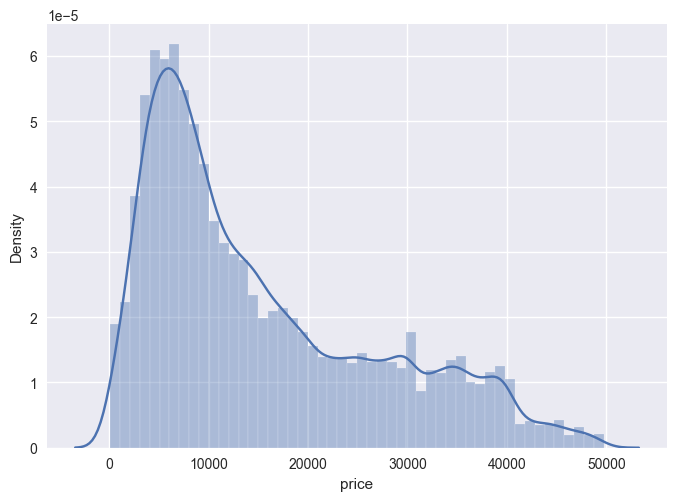

<Figure size 800x550 with 0 Axes>

In [100]:
sns.distplot(y_train)
fig = plt.figure()

In [101]:
X_train.describe()

,year,manufacturer,model,condition,cylinders,odometer,drive
count,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000,95111.000000
mean,2010.815489,15276.571791,15527.927947,3.648526,5.917980,107442.839619,1.439781
std,5.755283,3981.660228,7515.881947,0.729088,1.604847,61115.334576,0.496363
min,1993.000000,4148.217693,3636.636193,1.000000,0.000000,0.000000,1.000000
25%,2007.000000,12969.213749,9631.554800,3.000000,4.000000,60000.000000,1.000000
50%,2012.000000,16581.802469,13772.327105,4.000000,6.000000,106390.000000,1.000000
75%,2015.000000,17703.939793,19258.587803,4.000000,8.000000,149572.500000,2.000000
max,2022.000000,25050.473008,43092.114703,6.000000,12.000000,287777.000000,2.000000


Checking the correlation:

In [102]:
X_train.corr()

,year,manufacturer,model,condition,cylinders,odometer,drive
year,1.000000,0.065352,0.291904,0.158906,-0.122475,-0.598425,0.068677
manufacturer,0.065352,1.000000,0.441767,-0.058521,0.460603,-0.062169,0.273982
model,0.291904,0.441767,1.000000,-0.153118,0.508326,-0.323820,0.266996
condition,0.158906,-0.058521,-0.153118,1.000000,-0.121272,-0.127574,0.019624
cylinders,-0.122475,0.460603,0.508326,-0.121272,1.000000,0.049959,0.254077
odometer,-0.598425,-0.062169,-0.323820,-0.127574,0.049959,1.000000,0.040683
drive,0.068677,0.273982,0.266996,0.019624,0.254077,0.040683,1.000000


Text(0.5, 1.0, 'Heatmap of all the Features of Train data set')

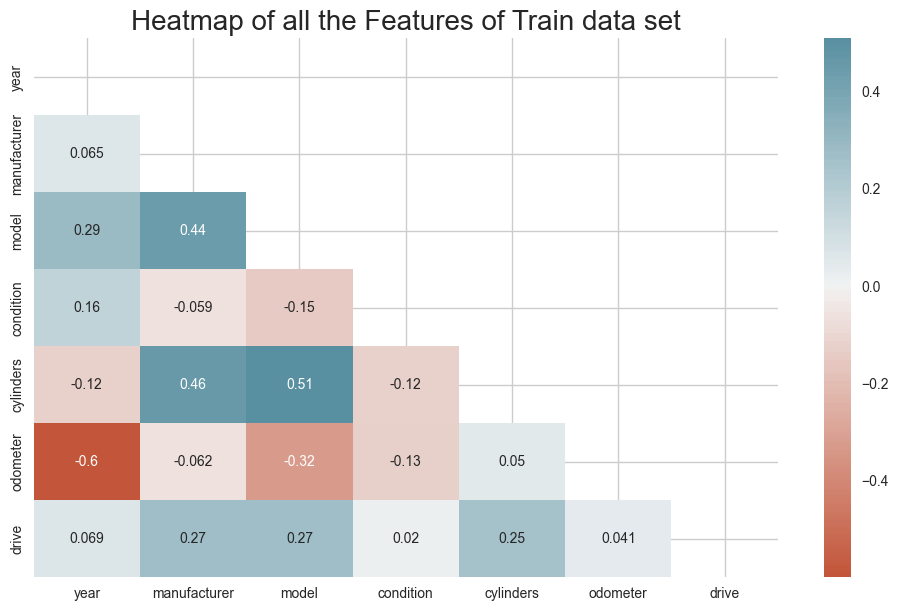

In [103]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(X_train.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0)
plt.title("Heatmap of all the Features of Train data set", fontsize = 20)

Relation of price and odometer value:

<Axes: xlabel='odometer', ylabel='price'>

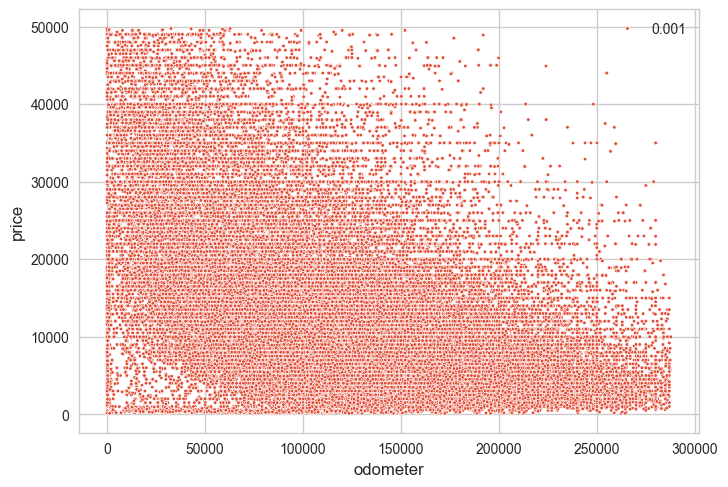

In [104]:
sns.scatterplot(df, x='odometer', y='price', marker=".", size=0.001)

Percentage of cars with different number of cylinders:

<Axes: xlabel='cylinders', ylabel='Percent'>

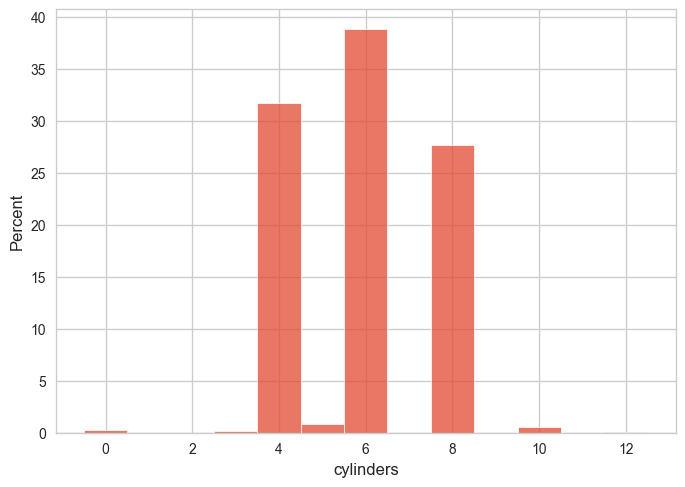

In [105]:
sns.histplot(X_train['cylinders'], stat='percent', discrete=True)

<Axes: xlabel='Percent', ylabel='manufacturer'>

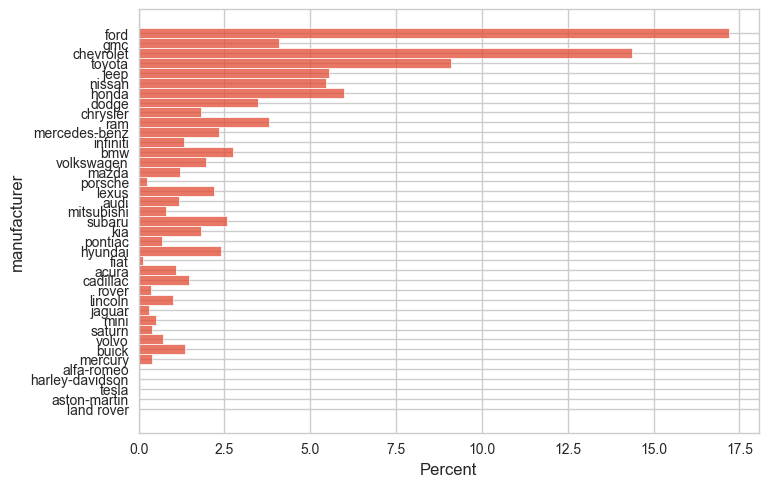

In [106]:
sns.histplot(data=df, y='manufacturer', stat='percent')

### Scaling:

In [107]:
scaler = StandardScaler()
scaler.set_output(transform='pandas')

feature_names = X_train.columns

X_train = scaler.fit(X_train).transform(X_train)

In [108]:
display(X_train)

,year,manufacturer,model,condition,cylinders,odometer,drive
0,0.379568,0.327812,0.494788,0.482075,0.051108,0.336368,-0.886011
1,0.205814,1.435581,2.179844,-0.889508,1.297339,-0.633999,1.128654
2,0.900831,0.609640,0.993196,-0.889508,0.051108,-1.275363,1.128654
3,1.422094,-0.281372,0.425002,0.482075,0.051108,-1.054452,1.128654
4,0.900831,0.609640,1.739422,-0.889508,0.051108,-1.474938,1.128654
...,...,...,...,...,...,...,...
136432,1.422094,-0.281372,1.420577,-0.889508,0.051108,-1.158682,1.128654
136434,1.595848,-0.371418,0.504848,-0.889508,0.051108,-1.632035,-0.886011
136435,1.074585,1.018269,1.987004,-0.889508,1.297339,-1.076312,1.128654
136437,1.248340,0.802741,0.936643,-0.889508,0.051108,-1.253846,-0.886011


# Setting up regressors:
In this project I am going to use 1 method of supervised learning - Random Forest and 2 neural network types - Multi Layer Perceptron and Recurrent Neural Network

Create a Random Forest Regressor

In [109]:
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt')

In [110]:
rf_model2 = RandomForestRegressor(n_estimators=2000, random_state=42, max_features='sqrt')

Create an MLP regressor:

In [111]:
from keras.models import Sequential
from keras import layers

import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense

def create_mlp_model1():
    model = Sequential()
    model.add(InputLayer(input_shape = X_train.shape[1]))
    model.add(Dense(6, activation="relu", name="layer1"))
    model.add(Dense(6, activation="relu", name="layer2"))
    model.add(Dense(1, activation = "linear", name="layer3"))
    return model

mlp_regressor1 = create_mlp_model1()
mlp_regressor1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 6)                 48        
                                                                 
 layer2 (Dense)              (None, 6)                 42        
                                                                 
 layer3 (Dense)              (None, 1)                 7         
                                                                 
Total params: 97 (388.00 Byte)
Trainable params: 97 (388.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [112]:
def create_mlp_model2():
    model = Sequential()
    model.add(InputLayer(input_shape = X_train.shape[1]))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation = "linear"))
    return model

mlp_regressor2 = create_mlp_model2()
mlp_regressor2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                256       
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1345 (5.25 KB)
Trainable params: 1345 (5.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Create an RNN model:

In [113]:
X_train_reshaped = X_train.to_numpy().reshape((X_train.shape[0], 1, X_train.shape[1]))
def create_rnn_model1():
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(1, X_train.shape[1]))),
    model.add(layers.SimpleRNN(6, activation='relu')),
    model.add(layers.Dense(6, activation='relu')),
    model.add(layers.Dense(1, activation='linear'))
    return model
    
rnn_model1 = create_rnn_model1()
rnn_model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 6)                 84        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
def create_rnn_model2():
    model = Sequential()
    model.add(layers.InputLayer(input_shape=(1, X_train.shape[1]))),
    model.add(layers.SimpleRNN(32, activation='relu')),
    model.add(layers.Dense(32, activation='relu')),
    model.add(layers.Dense(1, activation='linear'))
    return model
    
rnn_model2 = create_rnn_model2()
rnn_model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 32)                1280      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train the models on the training data

Prepare the validation set for validation(encode, scale):

In [115]:
X_test = tEncoder.transform(X_test)
X_test = oEncoder.transform(X_test)
X_test = scaler.transform(X_test)

Train the Random Forest model:

In [116]:
rf_model1.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', random_state=42)

In [117]:
rf_model2.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=2000, random_state=42)

Train the MLP model:

In [118]:
import datetime
import os

mlp_regressor1.compile(
    optimizer = "rmsprop",
    loss = "mse",
    metrics = ['mae'])


mlp_history1 = mlp_regressor1.fit(X_train, y_train, epochs = 100, batch_size=8,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
11889/11889 [==============================] - 12s 963us/step - loss: 194061216.0000 - mae: 10401.2051 - val_loss: 40574020.0000 - val_mae: 4846.2607
Epoch 2/100
11889/11889 [==============================] - 11s 942us/step - loss: 33802200.0000 - mae: 3965.2612 - val_loss: 28500270.0000 - val_mae: 3568.3826
Epoch 3/100
11889/11889 [==============================] - 11s 944us/step - loss: 31252906.0000 - mae: 3695.3809 - val_loss: 28029648.0000 - val_mae: 3533.8228
Epoch 4/100
11889/11889 [==============================] - 11s 941us/step - loss: 31023822.0000 - mae: 3677.8152 - val_loss: 27851466.0000 - val_mae: 3521.7837
Epoch 5/100
11889/11889 [==============================] - 11s 935us/step - loss: 30878982.0000 - mae: 3665.4163 - val_loss: 27733298.0000 - val_mae: 3513.7078
Epoch 6/100
11889/11889 [==============================] - 11s 944us/step - loss: 30756568.0000 - mae: 3655.6270 - val_loss: 27642274.0000 - val_mae: 3498.9045
Epoch 7/100
11889/11889 [=============

In [119]:
mlp_regressor2.compile(
    optimizer = "rmsprop",
    loss = "mse",
    metrics = ['mae'])


mlp_history2 = mlp_regressor2.fit(X_train, y_train, epochs = 100, batch_size=8,verbose=1, validation_data=(X_test, y_test))

Epoch 1/100


11889/11889 [==============================] - 12s 974us/step - loss: 80786472.0000 - mae: 5729.8999 - val_loss: 28265072.0000 - val_mae: 3550.6829
Epoch 2/100
11889/11889 [==============================] - 11s 967us/step - loss: 30942336.0000 - mae: 3677.5779 - val_loss: 27622248.0000 - val_mae: 3495.0835
Epoch 3/100
11889/11889 [==============================] - 11s 951us/step - loss: 30537288.0000 - mae: 3642.2566 - val_loss: 27338962.0000 - val_mae: 3464.1863
Epoch 4/100
11889/11889 [==============================] - 11s 958us/step - loss: 30334006.0000 - mae: 3622.6907 - val_loss: 27214198.0000 - val_mae: 3460.8359
Epoch 5/100
11889/11889 [==============================] - 11s 957us/step - loss: 30198774.0000 - mae: 3611.7991 - val_loss: 26999882.0000 - val_mae: 3441.4534
Epoch 6/100
11889/11889 [==============================] - 11s 959us/step - loss: 30085696.0000 - mae: 3603.4067 - val_loss: 26944332.0000 - val_mae: 3430.7891
Epoch 7/100
11889/11889 [===========================

Train the RNN model:

In [120]:
X_test_reshaped = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

rnn_model1.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

rnn_history1 = rnn_model1.fit(X_train_reshaped, y_train, epochs=100, batch_size=8, shuffle=True, validation_data=(X_test_reshaped, y_test))

Epoch 1/100


11889/11889 [==============================] - 15s 1ms/step - loss: 163086224.0000 - mae: 8980.0498 - val_loss: 31507988.0000 - val_mae: 3861.8801
Epoch 2/100
11889/11889 [==============================] - 13s 1ms/step - loss: 32144966.0000 - mae: 3786.0730 - val_loss: 28522908.0000 - val_mae: 3597.6499
Epoch 3/100
11889/11889 [==============================] - 13s 1ms/step - loss: 31124460.0000 - mae: 3689.5132 - val_loss: 27882296.0000 - val_mae: 3527.4998
Epoch 4/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30828800.0000 - mae: 3661.7063 - val_loss: 27689126.0000 - val_mae: 3507.5789
Epoch 5/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30683730.0000 - mae: 3649.7771 - val_loss: 27686190.0000 - val_mae: 3509.9097
Epoch 6/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30584198.0000 - mae: 3639.4832 - val_loss: 27439464.0000 - val_mae: 3487.9521
Epoch 7/100
11889/11889 [==============================] - 13s 

In [121]:
rnn_model2.compile(optimizer='rmsprop', loss='mse', metrics = ['mae'])

rnn_history2 = rnn_model2.fit(X_train_reshaped, y_train, epochs=100, batch_size=8, shuffle=True, validation_data=(X_test_reshaped, y_test))

Epoch 1/100


11889/11889 [==============================] - 14s 1ms/step - loss: 78694792.0000 - mae: 5668.3608 - val_loss: 28204570.0000 - val_mae: 3560.5808
Epoch 2/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30843466.0000 - mae: 3669.3965 - val_loss: 27394908.0000 - val_mae: 3489.9238
Epoch 3/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30405460.0000 - mae: 3632.1973 - val_loss: 27154776.0000 - val_mae: 3469.8289
Epoch 4/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30206424.0000 - mae: 3616.0852 - val_loss: 27004776.0000 - val_mae: 3457.1809
Epoch 5/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30081920.0000 - mae: 3605.7014 - val_loss: 27083770.0000 - val_mae: 3425.5542
Epoch 6/100
11889/11889 [==============================] - 13s 1ms/step - loss: 30007858.0000 - mae: 3602.1523 - val_loss: 26852304.0000 - val_mae: 3431.8691
Epoch 7/100
11889/11889 [==============================] - 13s 1

# Validation and evaluation

### Do predictions using the model:

In [122]:
# Make predictions on the test set
rf_y_pred1 = rf_model1.predict(X_test)
rf_y_pred2 = rf_model2.predict(X_test)

In [123]:
mlp_y_pred1 = mlp_regressor1.predict(X_test)
mlp_y_pred2 = mlp_regressor2.predict(X_test)

991/991 [==============================] - 1s 685us/step


In [124]:
rnn_y_pred1 = rnn_model1.predict(X_test_reshaped)
rnn_y_pred2 = rnn_model2.predict(X_test_reshaped)

991/991 [==============================] - 1s 686us/step


### Evaluate the models:

Random forest model:

In [125]:
mean_absolute_error(y_test, rf_y_pred1)

1687.722781495304

In [126]:
r2_score(y_test, rf_y_pred1)

0.9215200975351087

In [127]:
mean_absolute_error(y_test, rf_y_pred2)

1667.7199525645478

In [128]:
rfscore = r2_score(y_test, rf_y_pred2)

Multilayer Perceptron Model:

In [129]:
r2_score(y_test, mlp_y_pred1)

0.8006986896223013

In [130]:
mlpscore = r2_score(y_test, mlp_y_pred2)

In [131]:
mlpscore

0.8228854510293679

Recurrent Neural Network Model:

In [132]:
r2_score(y_test, rnn_y_pred1)

0.800414495396456

In [133]:
rnnscore = r2_score(y_test, rnn_y_pred2)

In [134]:
rnnscore

0.8229336286010543

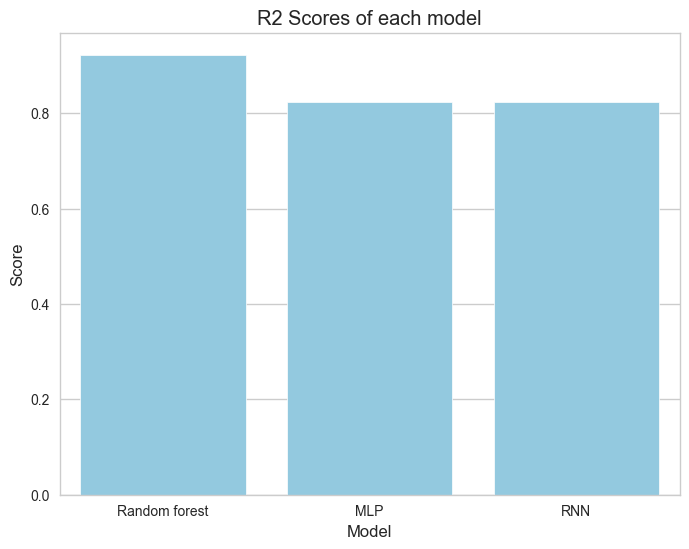

In [135]:
models = ['Random forest', 'MLP', 'RNN']

# Create a DataFrame for the data (optional but useful for Seaborn)
import pandas as pd
scores = pd.DataFrame({'Model': models, 'Score': [rfscore, mlpscore, rnnscore]})

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.barplot(x='Model', y='Score', data=scores, color='skyblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('R2 Scores of each model')

# Show the plot
plt.show()

Plot Training and Validations MAE and loss

In [136]:
def plotLossAndMae(history):
    fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

    train_mae = history.history['mae']
    val_mae = history.history['val_mae']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    ax1.plot(train_mae, label='train')
    ax1.plot(val_mae, label='validation')
    ax1.set_title("MAE")

    ax2.plot(train_loss, label='train')
    ax2.plot(val_loss, label='validation')
    ax2.set_title("Loss")

    ax1.legend()
    ax2.legend()

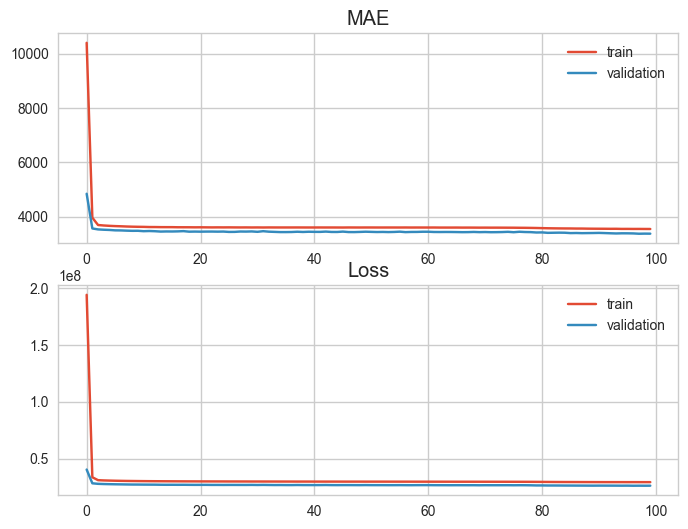

In [137]:
plotLossAndMae(mlp_history1)

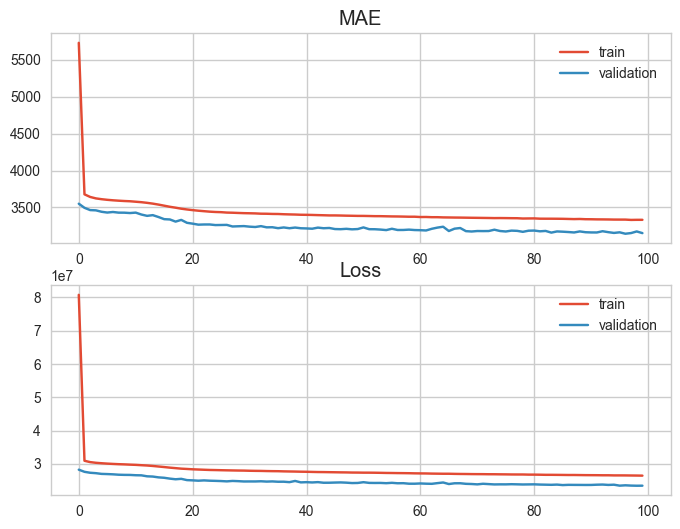

In [138]:
plotLossAndMae(mlp_history2)

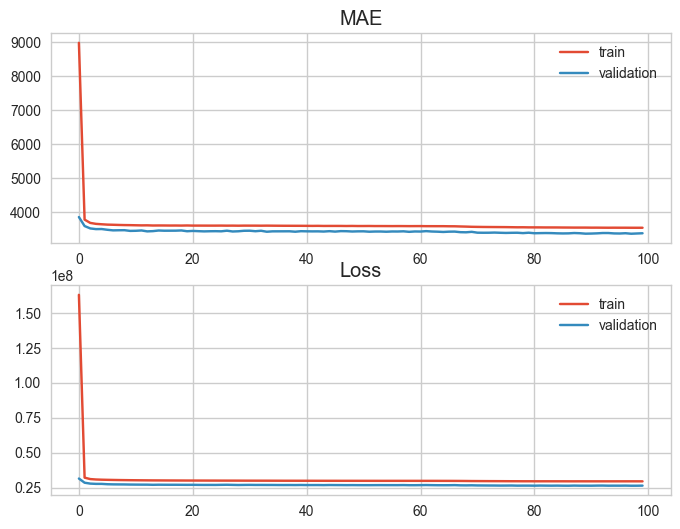

In [139]:
plotLossAndMae(rnn_history1)

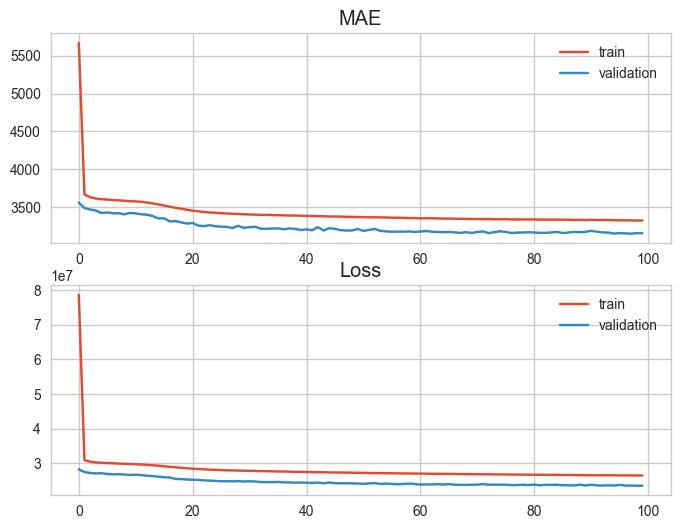

In [140]:
plotLossAndMae(rnn_history2)

# Influence of the parameters on the results of the prediction:
Multiple parameters have been adjusted in order to improve the results of the predictions:
1. Target Encoder parameters(min samples leaf and smoothing) were decreased, which have slightly improved the r2 score and reduces errors.

2. NN architecture (number of layers, number of neurons in each layer, activation function). Number of hidden layer has been set to 2 by default, increasing it to 3 gives no significant results. Number of neurons per layer has been chosen according to a rule of thumb(2/3*input + output), increasing this number to 32 gave better results. Different "ReLU-type" activation functions were tried, no improvements were observed.

3. NN training parameters(number of epochs, batch size). Increasing number of epochs improves final result, however, after 10 tries gains become minimal, while computational complexity continues to grow. Number of epochs is set to 100 to observe the following behaviour of the model. Increasing batch size reduces computational time and takes better advantage of the GPU capabilities, but reduces the model's score.

# Comparison of different machine learning methods

Visualize predictions in comparison with actual values:

In [141]:
def Graph_prediction_pair_comparison(n, y_actual, y_predicted_1, y_predicted_2):
    y = y_actual
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'b', marker='.', label="actual")
    plt.plot(aa, y_predicted_1[:number], 'r', label="Model 1")
    plt.plot(aa, y_predicted_2[:number], 'g', label="Model 2")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

In [142]:
def Graph_prediction_comparison(n, y_actual, y_predicted_1, y_predicted_2, y_predicted_3):
    y = y_actual
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], 'b', marker='.', label="actual")
    plt.plot(aa, y_predicted_1[:number], 'r', label="Random Forest")
    plt.plot(aa, y_predicted_2[:number], 'g', label="MLP")
    plt.plot(aa, y_predicted_3[:number], 'c', label="RNN")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

### Compare pairs RF_model_1-RF_model_2 etc.

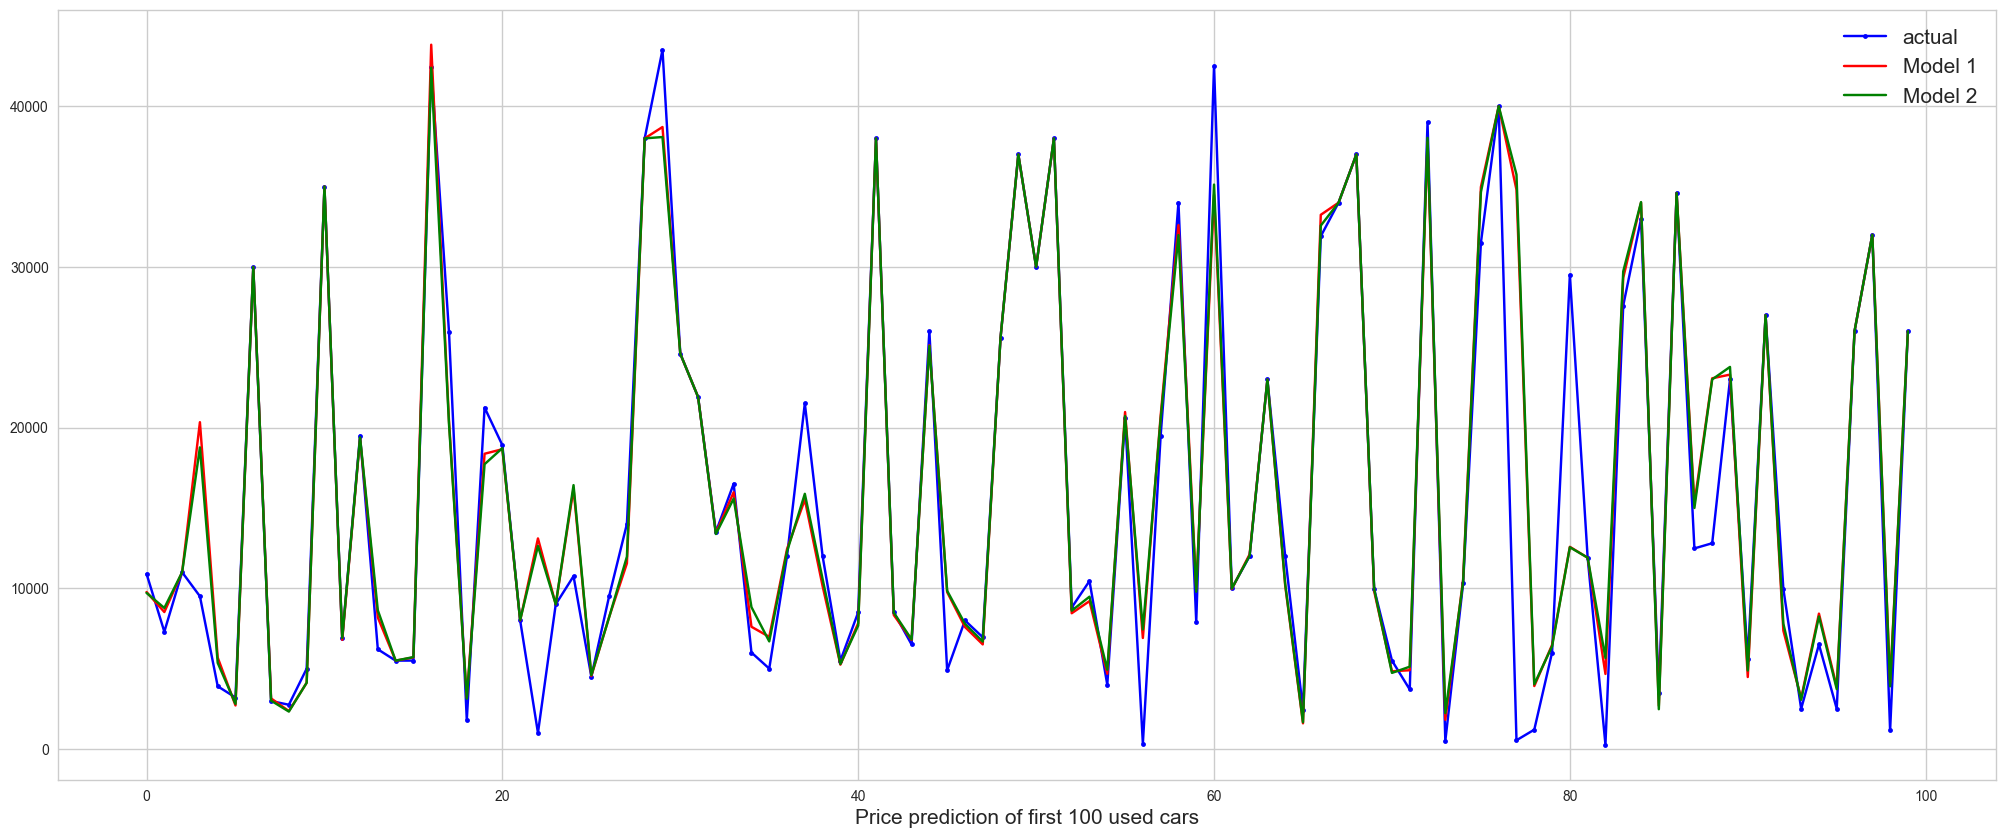

In [143]:
Graph_prediction_pair_comparison(100, y_test, rf_y_pred1, rf_y_pred2)

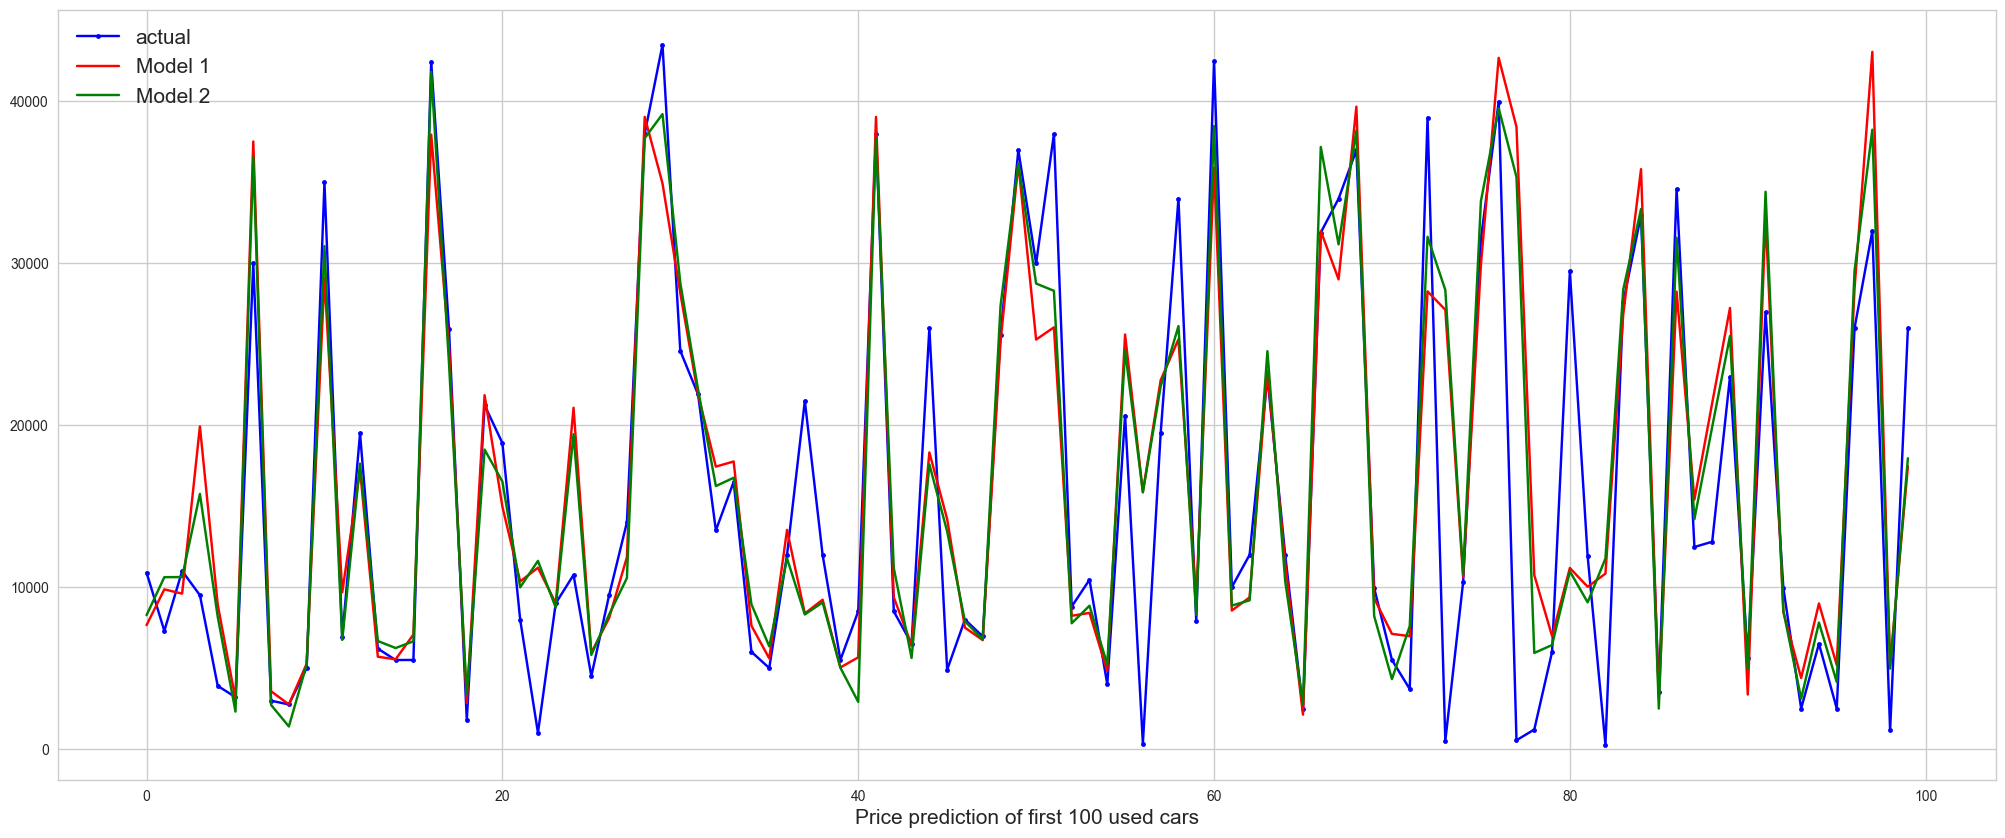

In [144]:
Graph_prediction_pair_comparison(100, y_test, mlp_y_pred1, mlp_y_pred2)

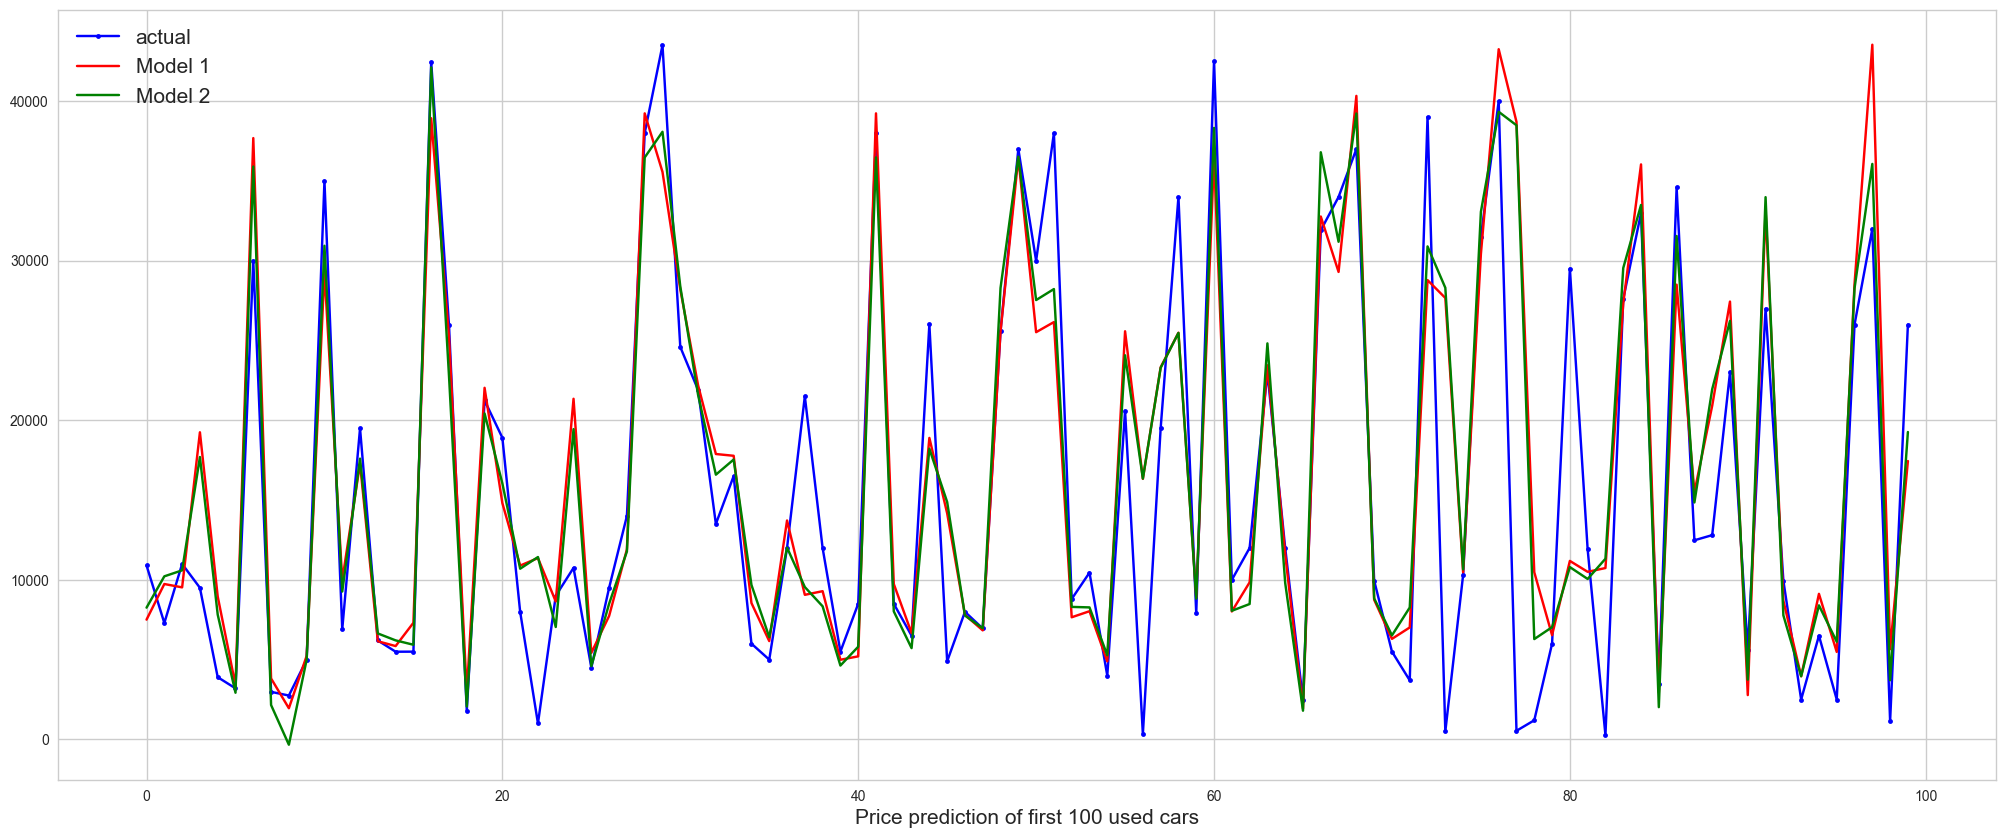

In [145]:
Graph_prediction_pair_comparison(100, y_test, rnn_y_pred1, rnn_y_pred2)

### Compare RF, MLP and RNN

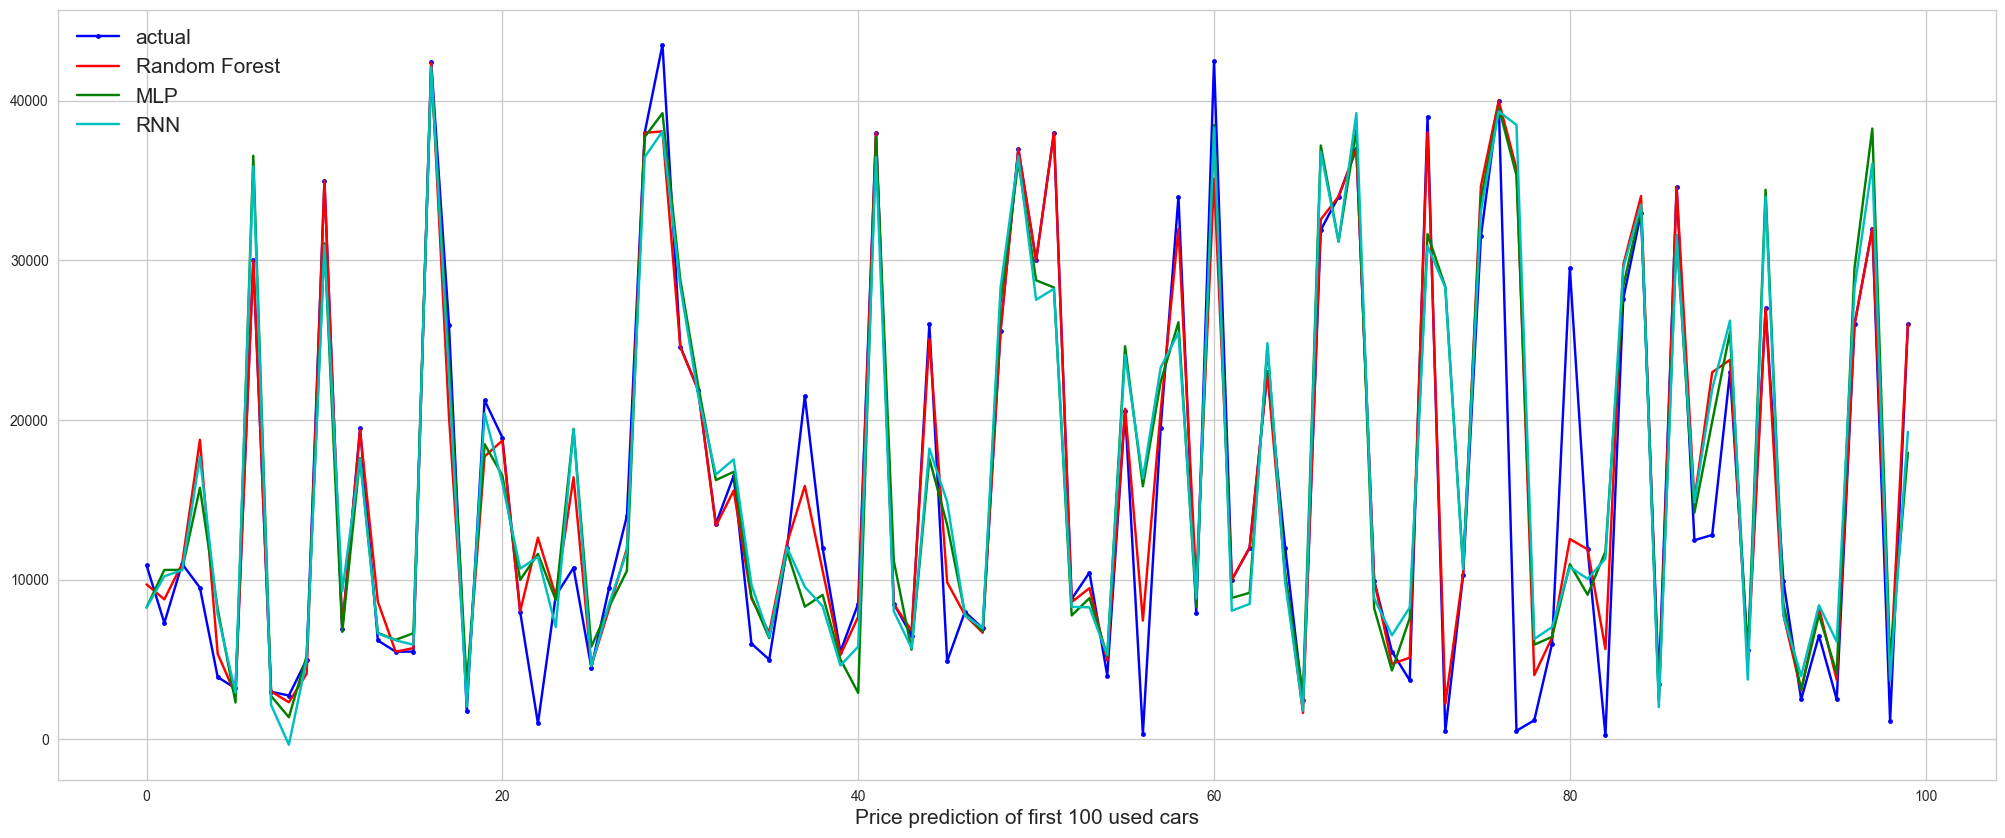

In [146]:
Graph_prediction_comparison(100, y_test, rf_y_pred2, mlp_y_pred2, rnn_y_pred2)

### Comparison conclusions
3 different machine learning methods have been used: Random Forest, MLP and RNN.
The results of the training and evaluating results have shown that:

1. The best results in terms of performance, setup simplicity and accuracy were demonstrated by the Random Forest method, its training with 2000 estimators took only 6 minutes, it has achieved an r2 score of 0.926 and shown the closest predictions on the comparison graph above.

2. MLP network has achieved score of 0.828. Its training took 11-12s per epoch. Its performance and setup simplicity are better than the RNN, but worse than the Random Forest.

3. RNN model it has achieved a similar score of 0.829. Its training took slightly more time, 13-14s per epoch comparing with 11-12s of MLP network. Additionaly, its setup complexity has been higher than the MLP variant.
    
4. The 2 neural network methods showed very close results. Possibly, the difference could be bigger if the parameters of the networks were different.

# Conclusion
Different machine learning methods were tried and tested during this individual assignment.

Multiple data preparation techniques were implemented to prepare the dataset for the algorithms.

As a result, 3 prediction-making models were created, each in 2 variants to test the influence of their parameters on the results. The models demonstrated adequate performance in prediction of a price of a used car based on its main parameters.

The performance of said models was validated usind validation part of the dataset, the predicted values were compared to the actual ones, the predictions were adequately close to the real values.

The model were compared based on their accuracy metrics, computational performance and simplicity in coding.

The results showed the advantage of supervised learning method(random forest) in solving this type of problems.

The neural network methods were found to be inferior to the supervised learning method, however they still have showed acceptable results.